# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain yourself the purposes of the project and actions you plan to take.]

[Please bear in mind that studying, amending and analyzing data is an iterative process. It is normal to return back to previous steps and correct/expand them to allow for further steps.]

## Initialization

[Load libraries that you believe are required for the project. You may realise later that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

### Load data

[Load the project data and have a look at the general information.]

In [2]:
# Load the data file into a DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [3]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
data.isnull().sum()/len(data)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64


there are missing data in columns: model_year, odometer, paint_color, is_4wd. The number of missing data in all columns is different. in the is_4wd column there are most of them, but it is possible that they are there instead of 0, and also the float64 type in the type column has uppercase and lowercase letters (you need to convert to one)


is_4wd should be bling, and it should be float date_posted - time, and it should be object model_year - float, should be int.

### Conclusions and further steps

[Formulate your conclusions regarding the initial data. What do you think looks normal and what does not not?]

[Explain your next steps and how they correlate with the conclusions you made so far. Specifically, it should be clear what part of data should be treated to make it more suitable for the required analysis.]

there are quite a few columns with missing data. we need to study each of them and understand the reason. if there is an opportunity to replace or supplement, then do it.
in the is_4wd column, check if the missing date is just zeros.
change data types from float to int and from object to time. 

## Treat missing values (if any)

In [6]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

we see that the is_4wd column is boolean, i.e. yes or no. yes - value 1, value no - 0. so you can replace all NANs with 0

In [7]:
data['is_4wd'] = data['is_4wd'].fillna(0)


In [8]:
data['is_4wd'].describe()

count    51525.000000
mean         0.496303
std          0.499991
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_4wd, dtype: float64

In [9]:
data.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

check the columns 'model_year' and 'odometer' for matching missing data. maybe there is a pattern

In [10]:
data_missing = data[(data['model_year'].isnull()) & (data['odometer'].isnull())]
data_missing.info()
data_missing.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 159 to 51399
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         549 non-null    int64  
 1   model_year    0 non-null      float64
 2   model         549 non-null    object 
 3   condition     549 non-null    object 
 4   cylinders     490 non-null    float64
 5   fuel          549 non-null    object 
 6   odometer      0 non-null      float64
 7   transmission  549 non-null    object 
 8   type          549 non-null    object 
 9   paint_color   452 non-null    object 
 10  is_4wd        549 non-null    float64
 11  date_posted   549 non-null    object 
 12  days_listed   549 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 60.0+ KB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,0.0,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,0.0,2018-10-22,37


549 matches, less than 0.01 percent, can be easily removed.

In [11]:
data = data.drop(data[(data['model_year'].isnull()) & (data['odometer'].isnull())].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50976 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         50976 non-null  object 
 3   condition     50976 non-null  object 
 4   cylinders     45775 non-null  float64
 5   fuel          50976 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  50976 non-null  object 
 8   type          50976 non-null  object 
 9   paint_color   41806 non-null  object 
 10  is_4wd        50976 non-null  float64
 11  date_posted   50976 non-null  object 
 12  days_listed   50976 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


In [12]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

most of the date is after 2005, in order not to get an incorrect solution, we use the median, not the average

In [13]:
data['model_year'].fillna(value=data.groupby('model')['model_year'].transform('median'), inplace=True)

In [14]:
data['model_year'].isna().sum()

0

In [15]:
data['cylinders'].describe()

count    45775.000000
mean         6.124413
std          1.660406
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [16]:
data['cylinders'].fillna(value=data.groupby('model')['cylinders'].transform('mean'), inplace=True)


In [17]:
data['cylinders'].isna().sum()

0

In [18]:
data['odometer'].fillna(value=data.groupby('model_year')['odometer'].transform('mean'), inplace=True)

In [19]:
data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


In [20]:
data = data.drop(index=45694)

In [21]:
data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50975 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50975 non-null  int64  
 1   model_year    50975 non-null  float64
 2   model         50975 non-null  object 
 3   condition     50975 non-null  object 
 4   cylinders     50975 non-null  float64
 5   fuel          50975 non-null  object 
 6   odometer      50975 non-null  float64
 7   transmission  50975 non-null  object 
 8   type          50975 non-null  object 
 9   paint_color   41805 non-null  object 
 10  is_4wd        50975 non-null  float64
 11  date_posted   50975 non-null  object 
 12  days_listed   50975 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


In [23]:
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [24]:
data['paint_color'] = data['paint_color'].fillna('other')

In [25]:
data['paint_color'].unique()

array(['other', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50975 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50975 non-null  int64  
 1   model_year    50975 non-null  float64
 2   model         50975 non-null  object 
 3   condition     50975 non-null  object 
 4   cylinders     50975 non-null  float64
 5   fuel          50975 non-null  object 
 6   odometer      50975 non-null  float64
 7   transmission  50975 non-null  object 
 8   type          50975 non-null  object 
 9   paint_color   50975 non-null  object 
 10  is_4wd        50975 non-null  float64
 11  date_posted   50975 non-null  object 
 12  days_listed   50975 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


what we did:
1. Replace missing data with mean or median in columns where possible
2. in the "color" column, the missing data was replaced with "other"

## Fix data types

change the type in the column over time to time

In [27]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y%m%dT')
data['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 50975, dtype: datetime64[ns]

## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [28]:
# Add datetime values for when the ad was placed

data['year_posted'] = pd.to_datetime(data['date_posted']).dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19,2018
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,other,0.0,2019-03-22,9,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2019


In [74]:
# Add the vehicle's age when the ad was placed
data['vehicle_age'] = data['year_posted'] - data['model_year'] + 1
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage,condition_counters
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19,2018,8.0,124883.614978,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,2018,8.0,124883.614978,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2019,7.0,102880.891908,4
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,other,0.0,2019-03-22,9,2019,17.0,162071.751024,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2019,3.0,45620.000000,3


In [75]:
# Add the vehicle's average mileage per year

data['avg_mileage'] = data.groupby('model_year')['odometer'].transform('median')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage,condition_counters
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19,2018,8.0,124883.614978,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,2018,8.0,124883.614978,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2019,7.0,102880.891908,4
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,other,0.0,2019-03-22,9,2019,17.0,162071.751024,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2019,3.0,45620.000000,3


In [76]:
# categorize the condition column into a numeric value and add a new column
def condition(age):
    if age == 'new':
        return 5
    elif age == 'like new':
        return 4
    elif age == 'excellent':
        return 3
    elif age == 'good':
        return 2
    elif age == 'fair':
        return 1
    else:
        return 0

In [32]:
condition('excellent')


3

In [33]:
data['condition_counters'] = data['condition'].apply(condition)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage,condition_counters
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19,2018,7.0,124883.614978,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,2018,7.0,124883.614978,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2019,6.0,102880.891908,4
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,other,0.0,2019-03-22,9,2019,16.0,162071.751024,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2019,2.0,45620.000000,3


## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [34]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50975 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               50975 non-null  int64         
 1   model_year          50975 non-null  float64       
 2   model               50975 non-null  object        
 3   condition           50975 non-null  object        
 4   cylinders           50975 non-null  float64       
 5   fuel                50975 non-null  object        
 6   odometer            50975 non-null  float64       
 7   transmission        50975 non-null  object        
 8   type                50975 non-null  object        
 9   paint_color         50975 non-null  object        
 10  is_4wd              50975 non-null  float64       
 11  date_posted         50975 non-null  datetime64[ns]
 12  days_listed         50975 non-null  int64         
 13  year_posted         50975 non-null  int64     

In [35]:
# print a sample of data
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage,condition_counters
0,9400,2011.0,bmw x5,good,6.00000,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19,2018,7.0,124883.614978,2
1,25500,2011.0,ford f-150,good,6.00000,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,2018,7.0,124883.614978,2
2,5500,2013.0,hyundai sonata,like new,4.00000,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2019,6.0,102880.891908,4
3,1500,2003.0,ford f-150,fair,8.00000,gas,162071.751024,automatic,pickup,other,0.0,2019-03-22,9,2019,16.0,162071.751024,1
4,14900,2017.0,chrysler 200,excellent,4.00000,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2019,2.0,45620.000000,3
5,14990,2014.0,chrysler 300,excellent,6.00000,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15,2018,4.0,93648.703319,3
6,12990,2015.0,toyota camry,excellent,4.00000,gas,79212.000000,automatic,sedan,white,0.0,2018-12-27,73,2018,3.0,82503.819348,3
7,15990,2013.0,honda pilot,excellent,6.00000,gas,109473.000000,automatic,SUV,black,1.0,2019-01-07,68,2019,6.0,102880.891908,3
8,11500,2012.0,kia sorento,excellent,4.00000,gas,104174.000000,automatic,SUV,other,1.0,2018-07-16,19,2018,6.0,112051.523598,3
9,9200,2008.0,honda pilot,excellent,5.99631,gas,147191.000000,automatic,SUV,blue,1.0,2019-02-15,17,2019,11.0,139878.910813,3


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

In [36]:
data['price'].describe()



count     50975.000000
mean      12130.817106
std       10042.165686
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16800.000000
max      375000.000000
Name: price, dtype: float64

<AxesSubplot:>

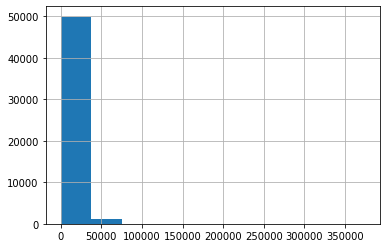

In [37]:
#
data['price'].hist()


Let's write a function that shows:
1. statistics for the column
2. decides which way to skewed
3.calculates IQR
4. checks the lower and upper bounds of outliers

In [38]:

def distribution_IQR(parameter):
    print('The histogram of: {}'.format(parameter))
    sns.boxplot(x=data[parameter])
    plt.show()
    if data[parameter].mean() > data[parameter].median():
        print('skewed to the right')
    else:
        print('skewed to the left')
    print('________________________')
    print('Statistic on: {}'.format(parameter))
    print(data[parameter].describe())
    Q1 = data[parameter].quantile(0.25)
    Q3 = data[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR
    max_iqr = Q3 + 1.5 * IQR
    print('____________')
    print('mi border:', min_iqr)
    print('max border:', max_iqr)
    print('_________________')
    if min_iqr < 0:
        print(' The outliers are considered to be values above', max_iqr)
        print('')


The histogram of: price


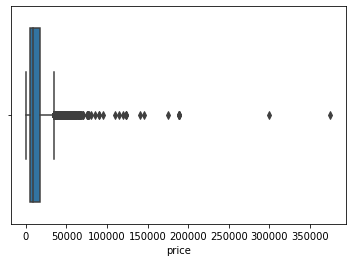

skewed to the right
________________________
Statistic on: price
count     50975.000000
mean      12130.817106
std       10042.165686
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16800.000000
max      375000.000000
Name: price, dtype: float64
____________
mi border: -12700.0
max border: 34500.0
_________________
 The outliers are considered to be values above 34500.0



In [39]:
#
distribution_IQR('price')


The histogram of: price


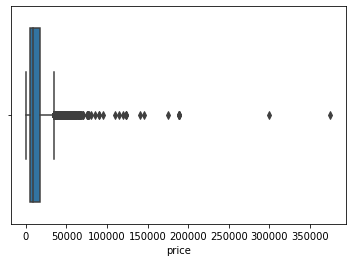

skewed to the right
________________________
Statistic on: price
count     50975.000000
mean      12130.817106
std       10042.165686
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16800.000000
max      375000.000000
Name: price, dtype: float64
____________
mi border: -12700.0
max border: 34500.0
_________________
 The outliers are considered to be values above 34500.0

The histogram of: vehicle_age


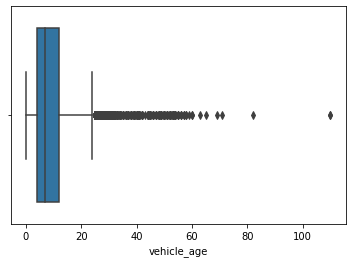

skewed to the right
________________________
Statistic on: vehicle_age
count    50975.000000
mean         8.518784
std          6.128776
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
____________
mi border: -8.0
max border: 24.0
_________________
 The outliers are considered to be values above 24.0

The histogram of: avg_mileage


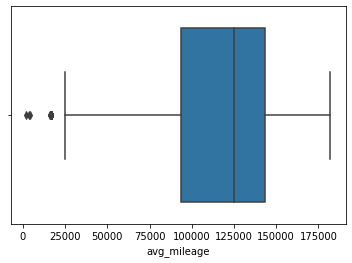

skewed to the left
________________________
Statistic on: avg_mileage
count     50975.000000
mean     115323.877497
std       39872.983398
min        1800.000000
25%       93648.703319
50%      124883.614978
75%      143331.120915
max      181997.985294
Name: avg_mileage, dtype: float64
____________
mi border: 19125.076924467387
max border: 217854.7473093719
_________________
The histogram of: cylinders


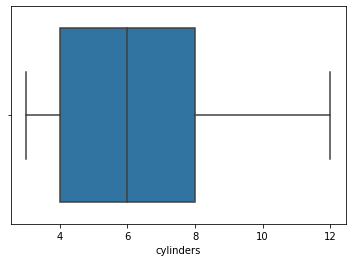

skewed to the right
________________________
Statistic on: cylinders
count    50975.000000
mean         6.123797
std          1.644806
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
____________
mi border: -2.0
max border: 14.0
_________________
 The outliers are considered to be values above 14.0

The histogram of: condition_counters


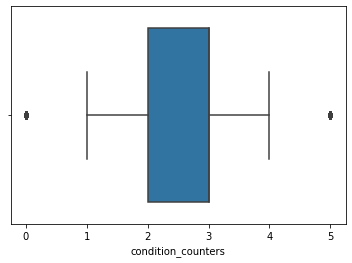

skewed to the left
________________________
Statistic on: condition_counters
count    50975.000000
mean         2.638117
std          0.712584
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_counters, dtype: float64
____________
mi border: 0.5
max border: 4.5
_________________


In [40]:
# by simple iteration we call the function on the columns and check
for parameter in ['price', 'vehicle_age', 'avg_mileage', 'cylinders', 'condition_counters']:
    distribution_IQR(parameter)
    



we see that in the case of the column:
1. price - the upper limit is 34500, the lower one is negative, because wrong distribution. we will consider for the lower bound -0
2. vehicle_age - upper limit 24. lower negative, take 0
3. avg_mileage - upper - 217854 lower 19125
4. cylinders - from the graph we see that there are no emissions, although the borders are at 14 and -8.
5. condition_counters - 4 and 1
everything outside these boundaries is considered outliers. at the same time, in the subsequent analysis, we will refer not only to the boundaries, but also to the graphs.



## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

In [41]:
data_clean = data.copy()
for parameter in ['price', 'vehicle_age', 'avg_mileage', 'cylinders', 'condition_counters']:
    Q1 = data_clean[parameter].quantile(0.25)
    Q3 = data_clean[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR
    max_iqr = Q3 + 1.5 * IQR
    data_clean = data_clean[(data_clean[parameter] > min_iqr)&(data_clean[parameter] < max_iqr)]
    
    



In [42]:
# Store data without outliers in a separate DataFrame

data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage,condition_counters
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19,2018,7.0,124883.614978,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,2018,7.0,124883.614978,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2019,6.0,102880.891908,4
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,other,0.0,2019-03-22,9,2019,16.0,162071.751024,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2019,2.0,45620.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,2018,5.0,102880.891908,4
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22,2018,16.0,158508.842286,0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,2018,9.0,132576.798250,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,2018,5.0,102880.891908,2


In [43]:
data_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage,condition_counters
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19,2018,7.0,124883.614978,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,2018,7.0,124883.614978,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2019,6.0,102880.891908,4
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,other,0.0,2019-03-22,9,2019,16.0,162071.751024,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2019,2.0,45620.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015.0,honda accord,excellent,4.0,gas,82503.819348,automatic,coupe,other,0.0,2018-11-24,89,2018,3.0,82503.819348,3
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,2018,5.0,102880.891908,4
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,2018,9.0,132576.798250,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,2018,5.0,102880.891908,2


created data_clean as data without outliers.

## Study core parameters without outliers

do a whisker plot comparison between clean data (no outliers) and data before we got rid of outliers

In [44]:
def distribution_IQR(parameter):
    print('The histogram of: {}'.format(parameter))
    sns.boxplot(x=data[parameter])
    plt.show()
    

The histogram of: price


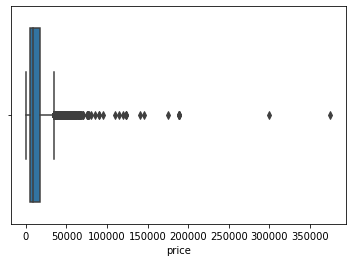

The histogram of: vehicle_age


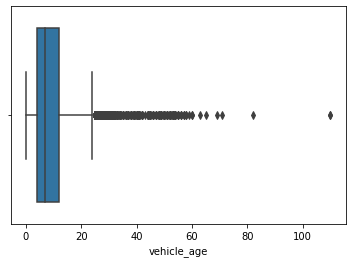

The histogram of: avg_mileage


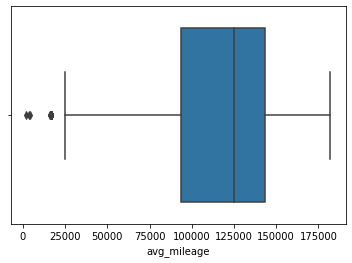

The histogram of: cylinders


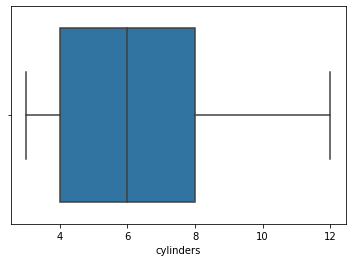

The histogram of: condition_counters


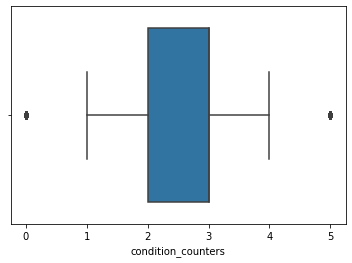

In [45]:
for parameter in ['price', 'vehicle_age', 'avg_mileage', 'cylinders', 'condition_counters']:
    distribution_IQR(parameter)

In [46]:
def distribution_IQR(parameter):
    print('The histogram of: {}'.format(parameter))
    sns.boxplot(x=data_clean[parameter])
    plt.show()

The histogram of: price


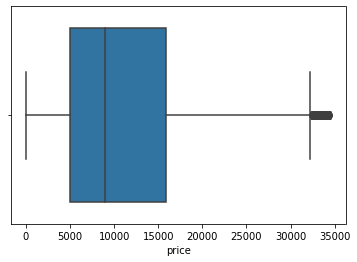

The histogram of: vehicle_age


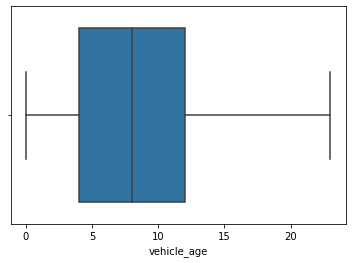

The histogram of: avg_mileage


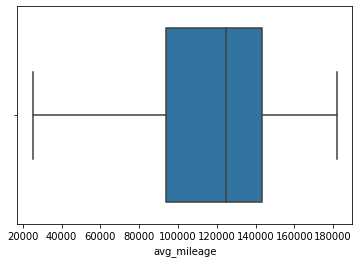

The histogram of: cylinders


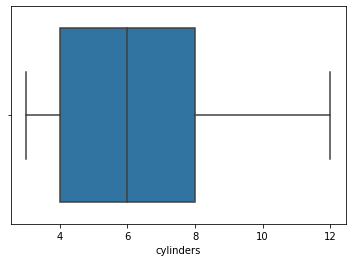

The histogram of: condition_counters


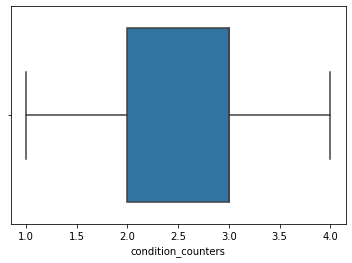

In [47]:
for parameter in ['price', 'vehicle_age', 'avg_mileage', 'cylinders', 'condition_counters']:
    distribution_IQR(parameter)

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [48]:
data_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage,condition_counters
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19,2018,7.0,124883.614978,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,2018,7.0,124883.614978,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2019,6.0,102880.891908,4
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,other,0.0,2019-03-22,9,2019,16.0,162071.751024,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2019,2.0,45620.000000,3


In [49]:
data_clean['days_listed'].describe()

count    47994.000000
mean        39.515127
std         28.187983
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [50]:
data_clean['days_listed'].median()

33.0

<AxesSubplot:>

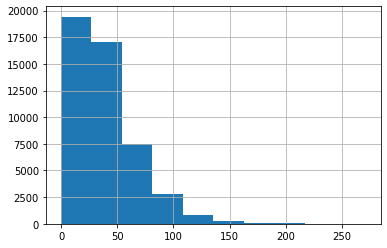

In [51]:
data_clean['days_listed'].hist()

<AxesSubplot:xlabel='days_listed'>

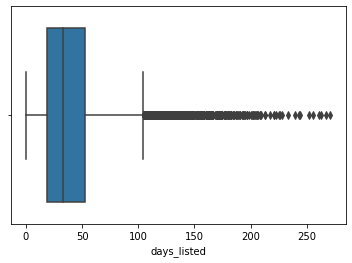

In [52]:
sns.boxplot(x=data_clean['days_listed'])

In [53]:
def distribution_IQR_new(parameter):
    print('Statistic on: {}'.format(parameter))
    print(data_clean[parameter].describe())
    Q1 = data_clean[parameter].quantile(0.25)
    Q3 = data_clean[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR
    max_iqr = Q3 + 1.5 * IQR
    print('____________')
    print('mi border:', min_iqr)
    print('max border:', max_iqr)
    
    
  

In [54]:
 distribution_IQR_new('days_listed') 

Statistic on: days_listed
count    47994.000000
mean        39.515127
std         28.187983
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
____________
mi border: -32.0
max border: 104.0


top outlier = 104
bottom = 0
0 is strange, especially -32, consider the first five days as an outlier and see what happens in these 5 days and after 104 days.


<function matplotlib.pyplot.show(close=None, block=None)>

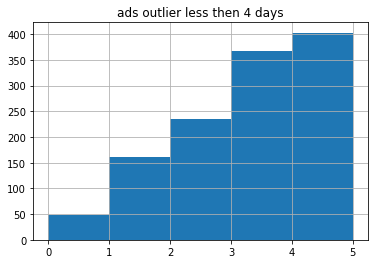

In [55]:
ad_outlier_data = data_clean.query('days_listed < 5')

plt.title('ads outlier less then 4 days')
ad_outlier_data['days_listed'].hist(bins=5, range=(0,5))
plt.show





<function matplotlib.pyplot.show(close=None, block=None)>

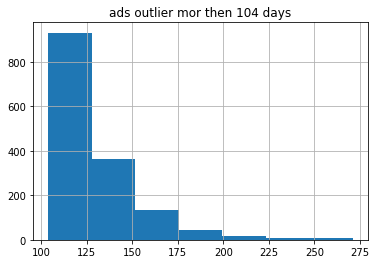

In [56]:
ad_outlier_data = data_clean.query('days_listed > 104')

plt.title('ads outlier mor then 104 days')
ad_outlier_data['days_listed'].hist(bins=7, range=(104, 271))
plt.show

In [57]:
print('Type and conditions of the venicles that sold in less then 5 days:')
type_car_short_ad=ad_outlier_data.groupby(['type', 'condition_counters'])['price'].agg(['count','mean']).reset_index().sort_values(by='count',ascending=False)
print(type_car_short_ad.iloc[:3])
print('---------------------------------')
print('')
print('Type and conditions of the venicles that sold in more then 104 days:')
type_car_long_ad=ad_outlier_data.groupby(['type','condition_counters' ])['price'].agg(['count','mean']).reset_index().sort_values(by='count',ascending=False)
print(type_car_long_ad.iloc[:3])

Type and conditions of the venicles that sold in less then 5 days:
     type  condition_counters  count          mean
2     SUV                   3    205  10607.995122
28  sedan                   3    191   8005.696335
32  truck                   3    148  17212.655405
---------------------------------

Type and conditions of the venicles that sold in more then 104 days:
     type  condition_counters  count          mean
2     SUV                   3    205  10607.995122
28  sedan                   3    191   8005.696335
32  truck                   3    148  17212.655405


no patterns visible.


## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

In [58]:
avg_price_group = data_clean.groupby(['type'])['price'].agg(['count','mean']).reset_index().sort_values(by='count', ascending=False)
avg_price_group

,type,count,mean
9,sedan,11824,6923.648934
0,SUV,11761,10346.744495
10,truck,11185,14945.887886
8,pickup,6260,14752.012939
3,coupe,1987,13398.116759
12,wagon,1503,8877.632735
5,mini-van,1130,7928.647788
4,hatchback,1001,6821.680320
11,van,579,8746.314335
2,convertible,327,12945.354740


<AxesSubplot:xlabel='type', ylabel='count'>

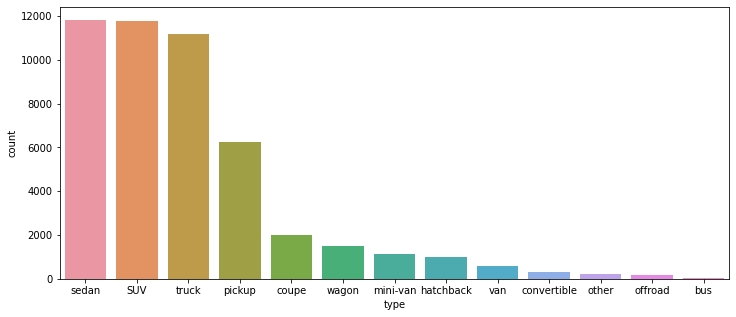

In [59]:
plt.figure(figsize=(12,5))
sns.barplot(x='type', y='count', data = avg_price_group)

In [60]:
top = list(avg_price_group.head(2)['type'])
top

['sedan', 'SUV']

два самых продаваемых типа автомобилей это 
Sedan
SUV

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

In [61]:
sedan = data_clean[data_clean['type'] == 'sedan']
sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage,condition_counters
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,2019,6.0,102880.891908,4
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2019,2.0,45620.000000,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15,2018,4.0,93648.703319,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.000000,automatic,sedan,white,0.0,2018-12-27,73,2018,3.0,82503.819348,3
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.000000,automatic,sedan,grey,0.0,2019-03-28,29,2019,7.0,112051.523598,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.000000,automatic,sedan,silver,0.0,2018-08-10,63,2018,13.0,152011.719127,3
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,2018,5.0,102880.891908,4
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,2018,9.0,132576.798250,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,2018,5.0,102880.891908,2


In [62]:
for_scatter = sedan[['price', 'vehicle_age', 'avg_mileage', 'condition_counters' ]]
for_scatter

,price,vehicle_age,avg_mileage,condition_counters
2,5500,6.0,102880.891908,4
4,14900,2.0,45620.000000,3
5,14990,4.0,93648.703319,3
6,12990,3.0,82503.819348,3
11,8990,7.0,112051.523598,3
...,...,...,...,...
51518,3750,13.0,152011.719127,3
51520,9249,5.0,102880.891908,4
51522,3950,9.0,132576.798250,3
51523,7455,5.0,102880.891908,2


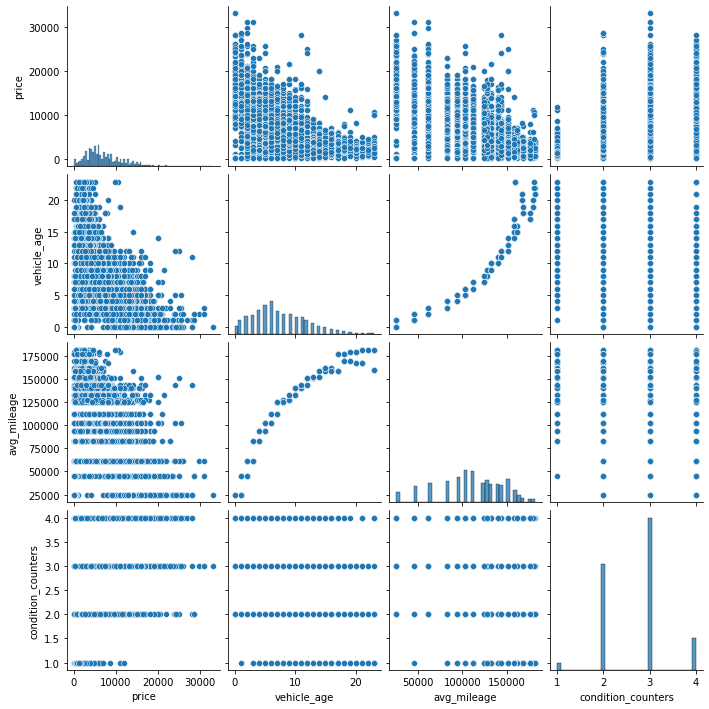

In [63]:
sns.pairplot(for_scatter)

In [64]:
for_scatter.corr()

,price,vehicle_age,avg_mileage,condition_counters
price,1.000000,-0.623327,-0.652202,0.292797
vehicle_age,-0.623327,1.000000,0.940128,-0.304131
avg_mileage,-0.652202,0.940128,1.000000,-0.308345
condition_counters,0.292797,-0.304131,-0.308345,1.000000


we see that in the case of the sedan, there is a strong correlation between mileage and age of the car. there is also a negative correlation between age and mileage and price. i.e. the older the car and the more mileage it has, the lower the price.

In [65]:
SUV = data_clean[data_clean['type'] == 'SUV']
SUV

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage,condition_counters
0,9400,2011.0,bmw x5,good,6.00000,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19,2018,7.0,124883.614978,2
7,15990,2013.0,honda pilot,excellent,6.00000,gas,109473.000000,automatic,SUV,black,1.0,2019-01-07,68,2019,6.0,102880.891908,3
8,11500,2012.0,kia sorento,excellent,4.00000,gas,104174.000000,automatic,SUV,other,1.0,2018-07-16,19,2018,6.0,112051.523598,3
9,9200,2008.0,honda pilot,excellent,5.99631,gas,147191.000000,automatic,SUV,blue,1.0,2019-02-15,17,2019,11.0,139878.910813,3
14,12990,2009.0,gmc yukon,excellent,8.00000,gas,132285.000000,automatic,SUV,black,1.0,2019-01-31,24,2019,10.0,132576.798250,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012.0,chevrolet traverse,good,6.00000,gas,144500.000000,automatic,SUV,other,1.0,2019-03-05,1,2019,7.0,112051.523598,2
51496,4999,2002.0,toyota 4runner,excellent,6.00000,gas,177901.000000,automatic,SUV,other,1.0,2018-05-26,59,2018,16.0,158508.842286,3
51500,6995,2012.0,buick enclave,excellent,6.00000,gas,157000.000000,automatic,SUV,white,1.0,2018-08-04,17,2018,6.0,112051.523598,3
51502,7995,2011.0,chevrolet equinox,like new,4.00000,gas,111088.000000,automatic,SUV,other,0.0,2019-04-01,175,2019,8.0,124883.614978,4


In [66]:
for_scatter_1 = SUV[['price', 'vehicle_age', 'avg_mileage', 'condition_counters' ]]
for_scatter_1

,price,vehicle_age,avg_mileage,condition_counters
0,9400,7.0,124883.614978,2
7,15990,6.0,102880.891908,3
8,11500,6.0,112051.523598,3
9,9200,11.0,139878.910813,3
14,12990,10.0,132576.798250,3
...,...,...,...,...
51495,9500,7.0,112051.523598,2
51496,4999,16.0,158508.842286,3
51500,6995,6.0,112051.523598,3
51502,7995,8.0,124883.614978,4


In [67]:
for_scatter_1.corr()

,price,vehicle_age,avg_mileage,condition_counters
price,1.000000,-0.584341,-0.587138,0.265480
vehicle_age,-0.584341,1.000000,0.935809,-0.309392
avg_mileage,-0.587138,0.935809,1.000000,-0.292794
condition_counters,0.265480,-0.309392,-0.292794,1.000000


in the case of the SUV, the correlation between price, mileage and age is still negative, slightly less than with the Sedan, but still quite strong. conclusion: the older the car and the more mileage, the lower its price.

In [68]:
data_clean['type'].value_counts()

sedan          11824
SUV            11761
truck          11185
pickup          6260
coupe           1987
wagon           1503
mini-van        1130
hatchback       1001
van              579
convertible      327
other            233
offroad          183
bus               21
Name: type, dtype: int64

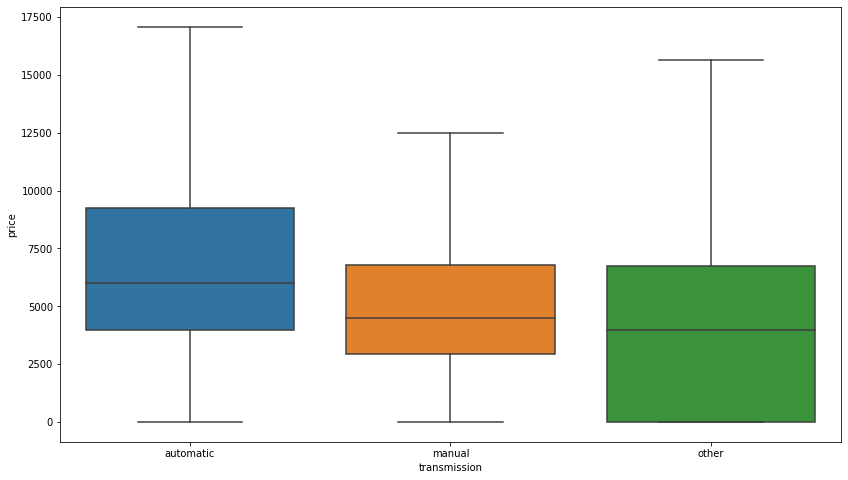

In [69]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='transmission', y='price', data=sedan, showfliers=False)

the most expensive  sedan cars sold with automatic transmission

In [70]:
data_clean[['paint_color', 'type']].value_counts()

paint_color  type    
white        truck       3368
other        sedan       2134
             SUV         2106
black        SUV         2070
silver       sedan       2011
                         ... 
yellow       other          1
purple       mini-van       1
             other          1
blue         bus            1
purple       van            1
Length: 155, dtype: int64

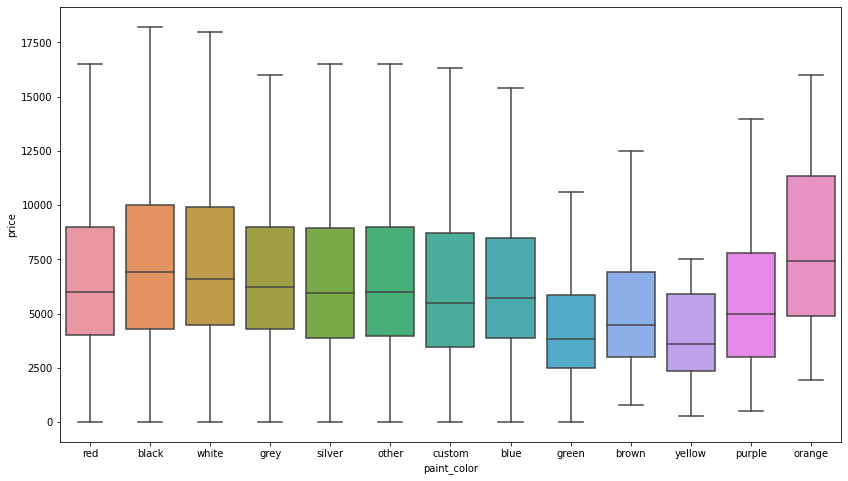

In [71]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='paint_color', y='price', data=sedan, showfliers=False)

hard to say for sure. in the case of the Sedan, the color doesn't really matter. it can be seen that orange cars are selling a little better, but there less then 50 of them, so it is impossible to draw an unambiguous conclusion.

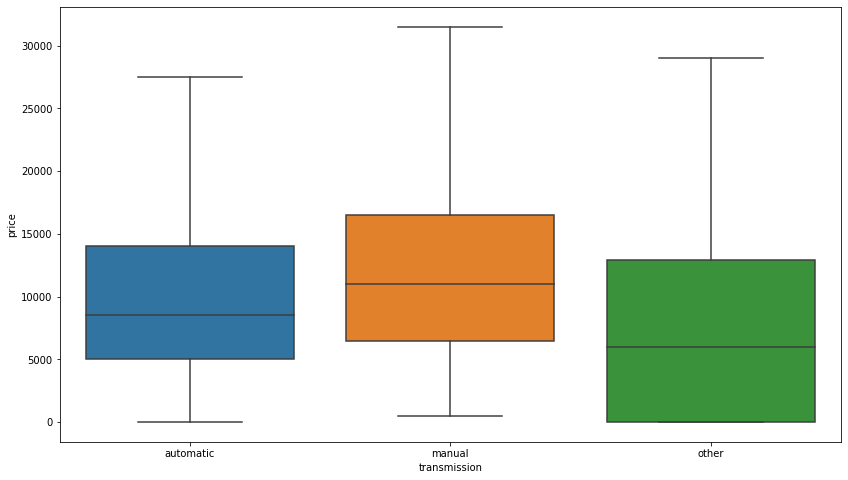

In [72]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='transmission', y='price', data=SUV, showfliers=False)

in the case of SUVs, those with a manual transmission will be more expensive.

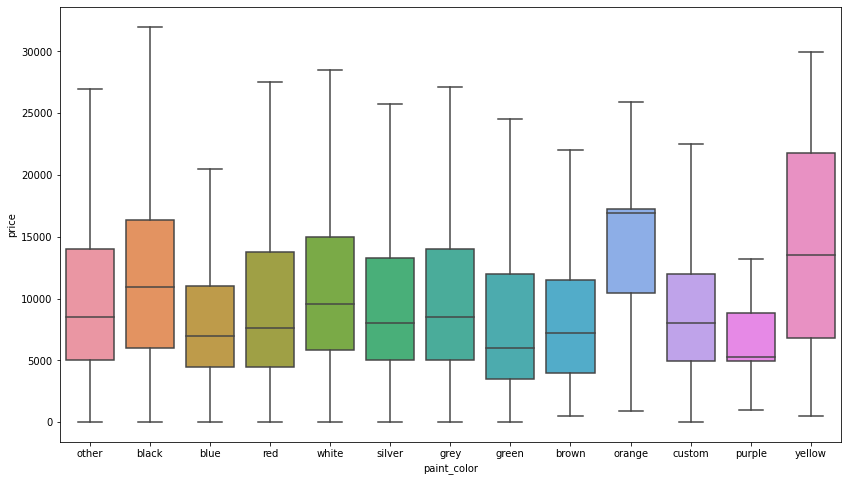

In [73]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='paint_color', y='price', data=SUV, showfliers=False)

orange and yellow SUVs are more expensive than others, but they are relatively few and definitely less than 50 of each. therefore, from those who can participate in the analysis, it turns out that the price is almost independent of color. black and white are sold a little more expensive, but not essential.

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

the total amount of data was:
lines - 51524
columns - 13.
there were columns with the wrong type and missing data.
we replaced missing data where possible with the median or mean. in non-numeric columns replaced by "other".
translated the data type in the columns to what suits us.
processed the data using whisker plots and other methods and found outliers.
got rid of outliers and compared data before and after getting rid of outliers.
conducted a comparative analysis and came to the following conclusions:
1. The best-selling types of cars are: sedan and SUV
2. The price depends more on the mileage and age of the car and less on the general condition and color, while the most "expensive" colors are white and black, but the difference is not great.